# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import polyfit
from tqdm import tqdm

# Regression Discontinuity

In [2]:
def construct_model_dep(data):
    rdd_df = data.assign(threshold=(data["New_Positives_threshold"] > 0).astype(int))

    model = smf.wls("DEP_DELAY_NEW~New_Positives_threshold*threshold", rdd_df).fit()
    
    return model
    
def show_graph_dep(data, k, state, de):
    rdd_df = data.assign(threshold=(data["New_Positives_threshold"] > 0).astype(int))
    
    #ax = ny.plot.scatter(x="New_Positives_3000", y="DEP_DELAY_NEW", color="C0")
    #ny.assign(predictions=model.fittedvalues).plot(x="New_Positives_3000", y="predictions",ax = ax, color="C1")
    data.assign(predictions=model.fittedvalues).plot(x="New_Positives", y="predictions", color="C1")
    plt.axvline(x = k, color = 'b')
    
    plt.title(f"{de} delay vs positive covid cases in {state} at threshold {k}")
    data.assign(predictions=model.fittedvalues)
    plt.show()

In [3]:
def construct_model_arr(data):
    rdd_df = data.assign(threshold=(data["New_Positives_threshold"] > 0).astype(int))

    model = smf.wls("ARR_DELAY_NEW~New_Positives_threshold*threshold", rdd_df).fit()
    
    return model
    
def show_graph_arr(data, k, state, de):
    rdd_df = data.assign(threshold=(data["New_Positives_threshold"] > 0).astype(int))
    
    #ax = ny.plot.scatter(x="New_Positives_3000", y="DEP_DELAY_NEW", color="C0")
    #ny.assign(predictions=model.fittedvalues).plot(x="New_Positives_3000", y="predictions",ax = ax, color="C1")
    data.assign(predictions=model.fittedvalues).plot(x="New_Positives", y="predictions", color="C1")
    plt.axvline(x = k, color = 'b')
    
    plt.title(f"{de} delay vs positive covid cases in {state} at threshold {k}")
    data.assign(predictions=model.fittedvalues)
    plt.show()

In [4]:
m = 0.7

# New York

In [5]:
ny_or_dep = pd.read_csv('NY_Flight_Covid.csv')
ny_or_dep.dropna(subset=['New Positives'], inplace = True)
ny_or_dep.dropna(subset=['DEP_DELAY_NEW'], inplace = True)

C:\Users\JkL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(len(ny_or_dep))
ny_or_dep
ny_or_dep['New_Positives'] = ny_or_dep['New Positives']

670128


In [7]:
ny_dep = ny_or_dep[ny_or_dep.New_Positives != 0]
#ny_dep = ny_dep[ny_dep.DEP_DELAY_NEW != 0]
ny_dep = ny_dep.groupby('New_Positives', as_index=False)['DEP_DELAY_NEW'].mean()

Text(0.5, 1.0, 'DEPATURE')

<Figure size 720x720 with 0 Axes>

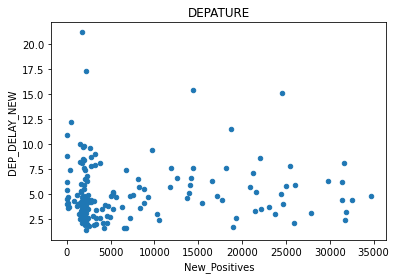

In [8]:
plt.figure(figsize=(10,10))
ny_dep.plot.scatter(x="New_Positives", y="DEP_DELAY_NEW")
plt.title("DEPATURE")

                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.5816      0.780      7.153      0.000       4.041       7.122
New_Positives_threshold            3.396e-05   3.91e-05      0.868      0.386   -4.32e-05       0.000
threshold                             1.0646      1.422      0.749      0.455      -1.742       3.871
New_Positives_threshold:threshold    -0.0003      0.000     -1.335      0.184      -0.001       0.000


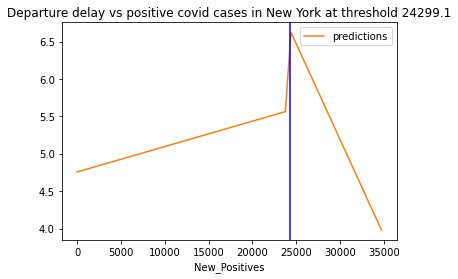

In [9]:
# Change k to change threshold percentage

k= m*max(ny_dep['New_Positives'])
ny_dep['New_Positives_threshold'] = ny_dep['New_Positives']-k
model = construct_model_dep(ny_dep)
print(model.summary().tables[1])
show_graph_dep(ny_dep, k, "New York", 'Departure')

# Texas

In [10]:
tx_or_dep = pd.read_csv('TX_Flight_Covid.csv')
tx_or_dep['New Positives'] = tx_or_dep['New Cases']
tx_or_dep.dropna(subset=['New Positives'], inplace = True)
tx_or_dep.dropna(subset=['DEP_DELAY_NEW'], inplace = True)

C:\Users\JkL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
tx_or_dep['New_Positives'] = tx_or_dep['New Positives']
tx_dep = tx_or_dep[tx_or_dep.New_Positives != 0]
tx_dep = tx_dep.groupby('New_Positives', as_index=False)['DEP_DELAY_NEW'].mean()
'''
tx['New_Positives'] = tx['New Positives']
tx['New_Positives_1000'] = tx['New Positives']-1000
tx['New_Positives_3000'] = tx['New Positives']-3000
tx['New_Positives_5000'] = tx['New Positives']-5000
tx['New_Positives_10000'] = tx['New Positives']-10000
tx['New_Positives_20000'] = tx['New Positives']-20000'''

"\ntx['New_Positives'] = tx['New Positives']\ntx['New_Positives_1000'] = tx['New Positives']-1000\ntx['New_Positives_3000'] = tx['New Positives']-3000\ntx['New_Positives_5000'] = tx['New Positives']-5000\ntx['New_Positives_10000'] = tx['New Positives']-10000\ntx['New_Positives_20000'] = tx['New Positives']-20000"

Text(0.5, 1.0, 'DELAY')

<Figure size 720x720 with 0 Axes>

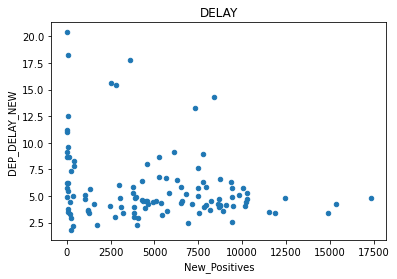

In [12]:
plt.figure(figsize=(10,10))
tx_dep.plot.scatter(x="New_Positives", y="DEP_DELAY_NEW")
plt.title("DELAY")

                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             4.2239      0.755      5.597      0.000       2.728       5.719
New_Positives_threshold              -0.0002   9.18e-05     -2.400      0.018      -0.000   -3.83e-05
threshold                             0.1061      3.309      0.032      0.974      -6.452       6.664
New_Positives_threshold:threshold     0.0002      0.001      0.226      0.821      -0.002       0.002


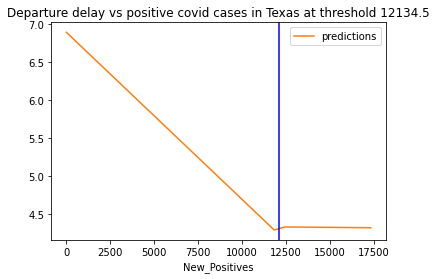

In [13]:
# Change k to change threshold percentage
k = m*max(tx_dep['New_Positives'])
tx_dep['New_Positives_threshold'] = tx_dep['New_Positives']-k
model = construct_model_dep(tx_dep)
print(model.summary().tables[1])
show_graph_dep(tx_dep, k, 'Texas', 'Departure')

# Group by #of Flights

# New York

In [14]:
ny_or_arr = pd.read_csv('NY_Flight_Covid.csv')
ny_or_arr.dropna(subset=['New Positives'], inplace = True)
ny_or_arr.dropna(subset=['ARR_DELAY_NEW'], inplace = True)

C:\Users\JkL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
print(len(ny_or_arr))
ny_or_arr
ny_or_arr['New_Positives'] = ny_or_arr['New Positives']

667324


In [16]:
ny_arr = ny_or_arr[ny_or_arr.New_Positives != 0]
#ny_arr = ny_arr[ny_arr.ARR_DELAY_NEW != 0]
ny_arr = ny_arr.groupby('New_Positives', as_index=False)['ARR_DELAY_NEW'].mean()

Text(0.5, 1.0, 'ARRIVAL')

<Figure size 720x720 with 0 Axes>

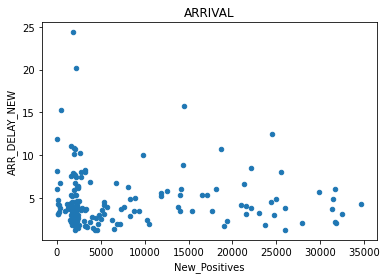

In [17]:
plt.figure(figsize=(10,10))
ny_arr.plot.scatter(x="New_Positives", y="ARR_DELAY_NEW")
plt.title("ARRIVAL")

                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             4.7076      0.873      5.395      0.000       2.985       6.430
New_Positives_threshold            2.471e-06   4.37e-05      0.056      0.955   -8.39e-05    8.88e-05
threshold                             0.8267      1.590      0.520      0.604      -2.312       3.965
New_Positives_threshold:threshold    -0.0002      0.000     -0.989      0.324      -0.001       0.000


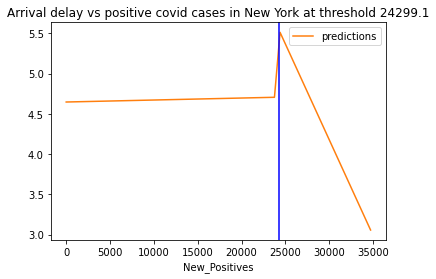

In [18]:
# Change k to change threshold percentage
k= m*max(ny_arr['New_Positives'])
ny_arr['New_Positives_threshold'] = ny_arr['New_Positives']-k
model = construct_model_arr(ny_arr)
print(model.summary().tables[1])
show_graph_arr(ny_arr, k, "New York", 'Arrival')

# Texas

In [19]:
tx_or_arr = pd.read_csv('TX_Flight_Covid.csv')
tx_or_arr['New Positives'] = tx_or_arr['New Cases']
tx_or_arr.dropna(subset=['New Positives'], inplace = True)
tx_or_arr.dropna(subset=['ARR_DELAY_NEW'], inplace = True)

C:\Users\JkL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
print(len(tx_or_arr))
tx_or_arr
tx_or_arr['New_Positives'] = tx_or_arr['New Positives']

1026654


In [21]:
tx_arr = tx_or_arr[tx_or_arr.New_Positives != 0]
#tx_arr = tx_arr[tx_arr.ARR_DELAY_NEW != 0]
tx_arr = tx_arr.groupby('New_Positives', as_index=False)['ARR_DELAY_NEW'].mean()

Text(0.5, 1.0, 'ARRIVAL')

<Figure size 720x720 with 0 Axes>

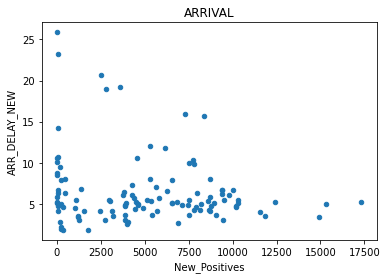

In [22]:
plt.figure(figsize=(10,10))
tx_arr.plot.scatter(x="New_Positives", y="ARR_DELAY_NEW")
plt.title("ARRIVAL")

                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.1730      0.949      5.453      0.000       3.293       7.053
New_Positives_threshold              -0.0002      0.000     -1.619      0.108      -0.000    4.19e-05
threshold                            -0.4680      4.160     -0.113      0.911      -8.712       7.776
New_Positives_threshold:threshold     0.0002      0.001      0.157      0.875      -0.002       0.003


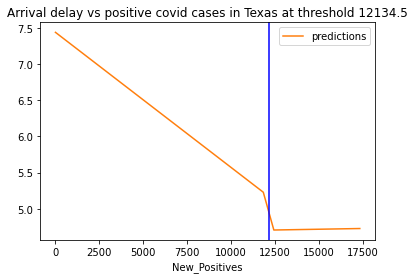

In [23]:
# Change k to change threshold percentage
k= m*max(tx_arr['New_Positives'])
tx_arr['New_Positives_threshold'] = tx_arr['New_Positives']-k
model = construct_model_arr(tx_arr)
print(model.summary().tables[1])
show_graph_arr(tx_arr, k, "Texas", 'Arrival')